# 이 글 읽으면 Hadoop ecosystem 이해 가능.
# 하둡 에코시스템을 이용하여 빅데이터 플랫폼을 구성하기 위한 청사진이 머릿속에 그려져야함.


# 1. Hadoop : 높은 확장성과 신뢰성 보유한 분산 storage
## 1-1. 하둡의 기본 구성 요소
- 분산 파일 시스템
    - HDFS(Hadoop DIstributed File System)
- 리소스 관리자
    - YARN(Yet Another Resource Negotiation)
- 분산 데이터 처리
    - MapReduce

를 제공하는 오픈 소스임.

## 1-2. Hadoop의 역사

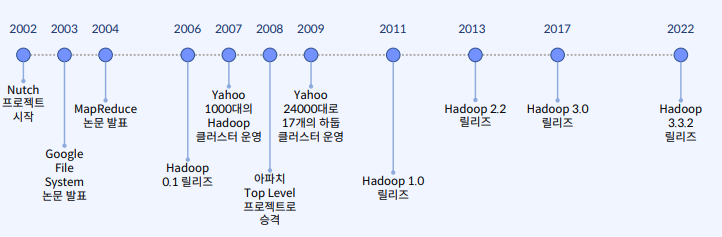

- 2006년에 하둡0.1 버전 배포

## 1-3. Hadoop ecosystem

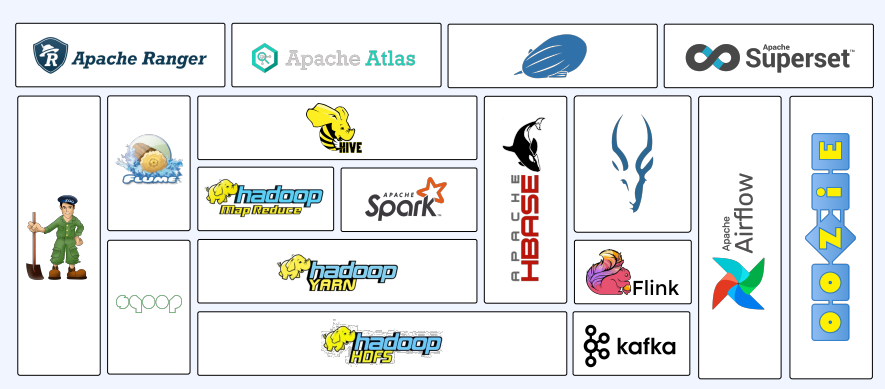

- 수집을 위한 프로젝트
    - apache flume
    - ninefine
    - kafca: 이벤트 관련 수집 
- 데이터처리
    - MapReduce: 분산 데이터 처리 담당 
    - apache spark: 데이터 처리 엔진, 배치부터 스트리밍, 그래프 처리 머신러닝 까지 통합된 엔진 제공
    - sql Hive: sql을 통해 배치처리 가능
    - apache impala: 대화형 쿼리형 엔진. 쿼리를 빠르게 받아볼 수 있음
    - Flick: 스트리밍처리뿐만아니라 배치처리 함께 제공
    - kafka : 스트리밍 처리를 위한 기능 제공
- 데이터 저장
    - HDFS
    - HBASE: 실시간으로 랜덤 엑세스 가능. 업데이트 가능
- zookeeper[주키퍼]
    - 하둡의 에코시스템 프로젝트 이름들이 동물이름으로 되어있음. 이를 조절해주는 기능을 제공해줌
- workflow 관리도구
    - apache oozie[우지]
    - apache Airflow: 최근에 많이 사용
    - apache Ranger: 하둡에코시스템에 보안시스템 제공. rest api사용해서.
    - apache Atlas: 메타데이터를 관리하는 프로젝트. 테이블 컬럼을 해시태그를 통해 검색. 테이블에 특정 컬럼에 권한을 부여해서 접근권한이나 마스킹 제공.
    - apache Zeppelin[제플린]: 웹기반의 노트북. 주피터 노트북같은거. 분석 결과를 그래프나 테이블과 같은 형태로 보여주는 기능이 있음. spark, hive 기타 jdbc와 연결해서 사용.
    - apache Superset: 웹기반의 데이터 시각화 BI툴. 에어비앤비에서 오픈소스화한 툴.


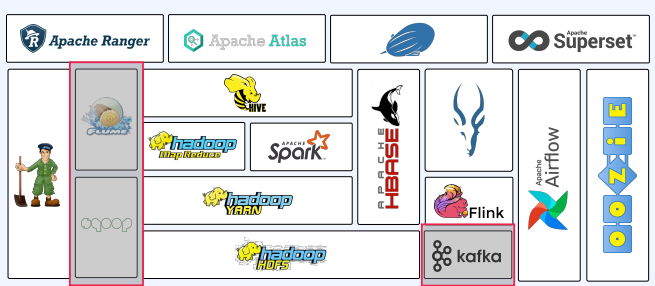

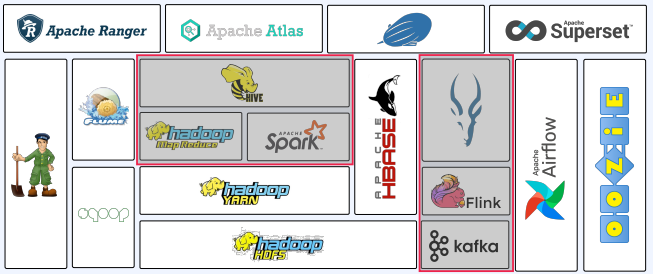

# 2. 빅데이터 플랫폼과 Hadoop ecosystem이 어떻게 연관되는지 알아보자

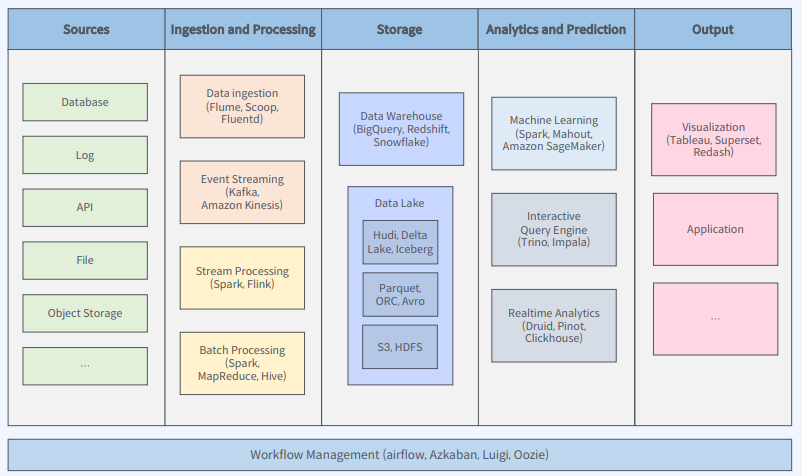

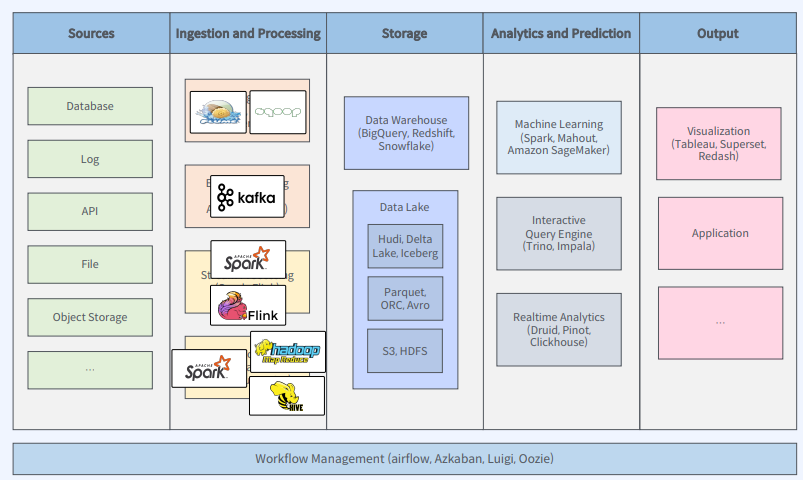

- 수집
    - Flume, scoop: 다양한 data sources들을 데이터 플랫폼에 구축된 저장소로 가져와야하는데 수집을 해줌. 
        - flume: 수집한 데이터를 다양한 곳으로 전송하는 프로젝트
        - scoop: 관계형 데이터베이스에있는 데이터를 하둡의 hdfs에 저장할 수 있도록 지원해주는 프로젝트
        
    - kafka: 실시간으로 들어오는 데이터를 수집. 수집된 데이터는 스트리밍처리를 kafka로한다.
    - Spark, Flink: 실시간으로 수집된 데이터의 경우 kafka로부터 데이터를 가져와서 바로 처리를 할 수 있다. 스트림 처리를 위한 프로젝트가 apache Spark와 Flink가 있다.
   
       - spark, flink : 스트림처리엔진을 제공. 배치처리 등 다양한 처리 기능을 제공하는 프로젝트
    - hadoop, MapReduce, Hive: 배치처리
       - 하둡: 분산 데이터 저장소인 hdfs와 리소스 관리를 위한 분산 데이터 처리를 위한 MapReduce를 제공한다.
           - 분산 데이터 처리를 위한 MapReduce가 대표적인 배치 처리 방법이다.
           - **MapReduce**: yarn에서 동작하는 분산 애플리케이션 중 하나이다.
       - hive: sql을 통해 배치 처리를 할 수 있음
       - **Spark**: 가장 많이 사용되는 데이터 처리 엔진. 하둡보다 배치처리에서 10~100배 빠름. 
           - MapReduce가 가지고 있던 여러 task들을 실행하는 경우에 file을 써야 하는 문제를 Spark에서는 메모리에서 처리하도록 함으로써 속도를 비약적으로 향상시킴.
           - spark은 자체적으로 spark sql이라는 배치처리 할 수 있음.



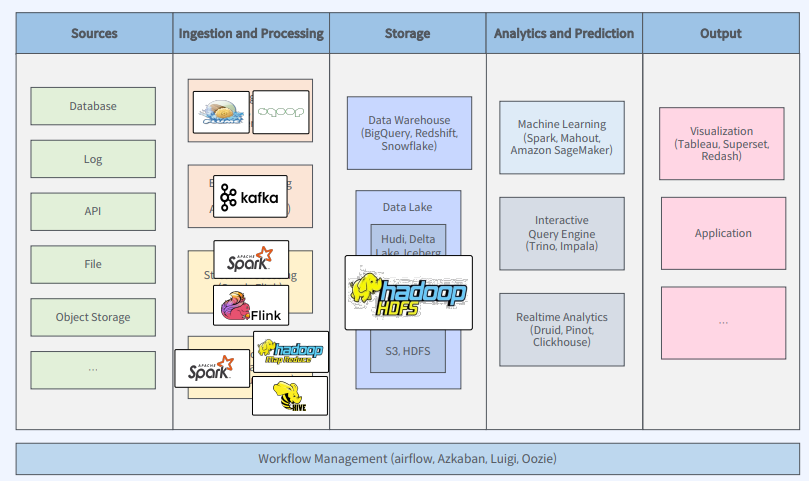

- Storage
    - HDFS: hadoop ecosystem의 기반이 되는 프로젝트
        - 분산 object storage. 하둡에코시스템에서 처리할 데이터를 저장.
        - 완전하진 않지만 data warehouse처럼 사용할 수도 있다.

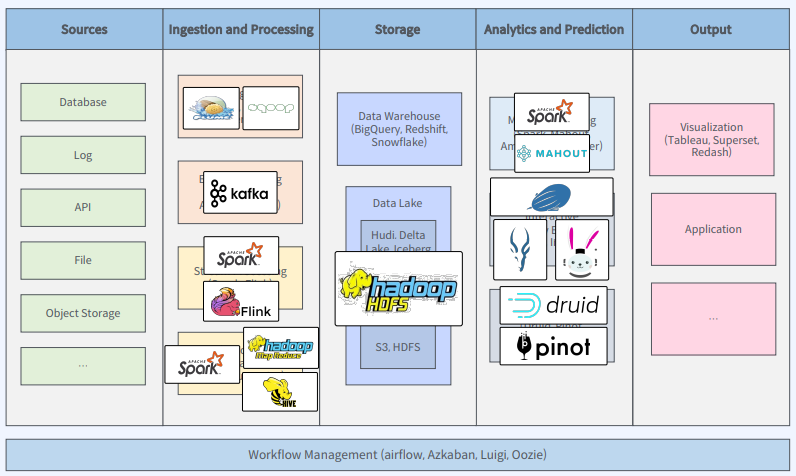

- Analytics and Prediction
    - 하이브는 처음부터 대화형 쿼리실행을 목적으로 개발된게 아니다. 최근에는 대화형 쿼리실행을 목적으로 개발된 애들이 많다. 쿼리 결과를 빠르게 보여주기 위해 리소스를 최대한 활용해서 빠르게 쿼리결과를 보여줌
        - Apache Impala
        - trino
    - 실시간으로 데이터를 분석할 수 있게 하는 
        - apache druid: 오픈소스 분석 데이터 베이스. 집계 기능 제공
        - pinot
        - 이 두개를 통해 이벤트 데이터들을 실시간으로 분석할 수 있는 환경 제공
    - 머신러닝을 지원하는 프로젝트
        - Spark: 자체적으로 ML라이브러리 제공
        - Mahout[머헛]: 확장가능한 기계학습 라이브러리 구현을 목표로 함.
        - 과거에는 mapreduce를 이용하여 머신러닝 알고리즘을 구현하였는데, 최근에는 spark이나 다른거를 이용해 알고리즘 구현을 지원.

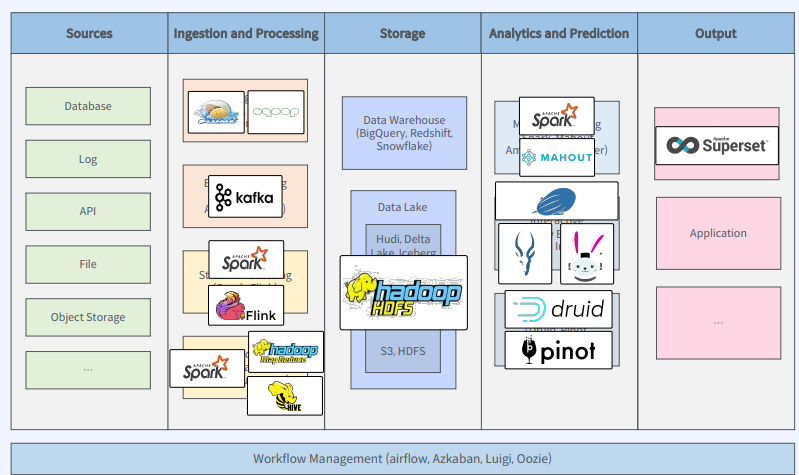

- 시각화
    - apache superset: 다양한 시각화 기능 제공. 대시보드 제공해서 분석결과 확인

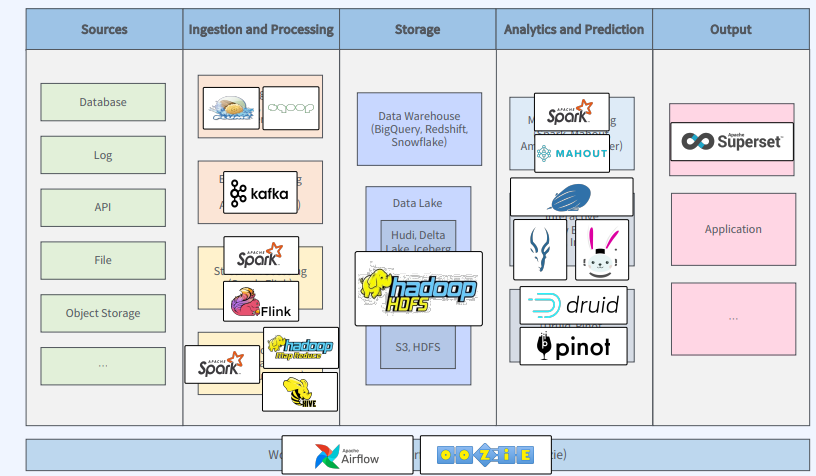

- workflow 관리 도구
    - apache airflow: 최근에 많이 사용됨.
    - oozie: 하둡 에코시스템 초기부터 workflow관리를 위해 만들어짐 

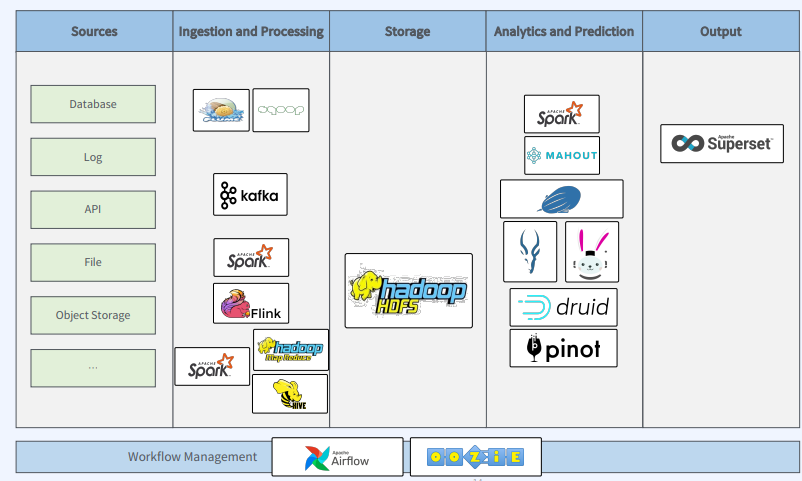

# 3. hadoop cluster 구축시 고려사항

## 3-1. cluster란
- 여러 대의 컴퓨터들이 연결되어 하나의 시스템처럼 동작하는 컴퓨터들의 집합
    - master와 worker로 구성됨
        - master: worker노드 관리
        - worker노드: 실제 일을 함. 조회하거나 서비스.
    - worker노드만 추가되면 확장되도록 하는 확장성이 있음.
    - 클러스트는 gateway를 줌.
        - gateway: 설정 파일을 통해서 client의 접근을 통제하는 역할을 함.

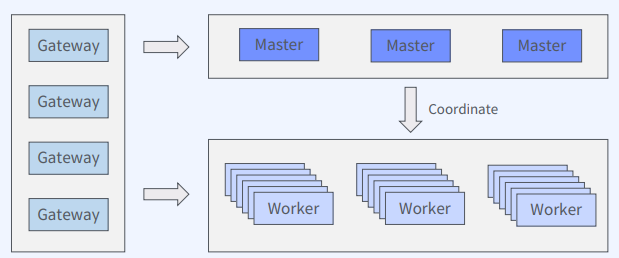

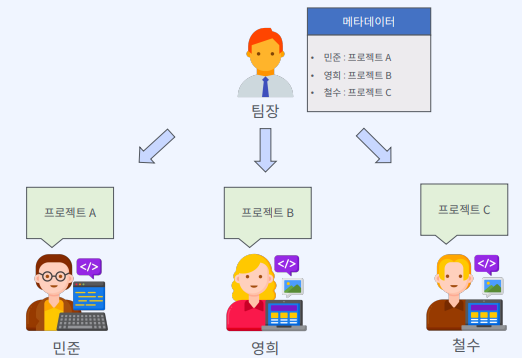

1. 팀원별로 하나의 프로젝트 맡고 있음.
2. 팀장은 각 팀원들이 맡고있는 프로젝트에 대한 정보를 가지고 있다. (= 메타데이터)
3. 철수가 휴가를 가야함.
4. 각 팀원들은 메인이되는 프로젝트와 보조가되는 프로젝트를 가지고 있어야겠네.

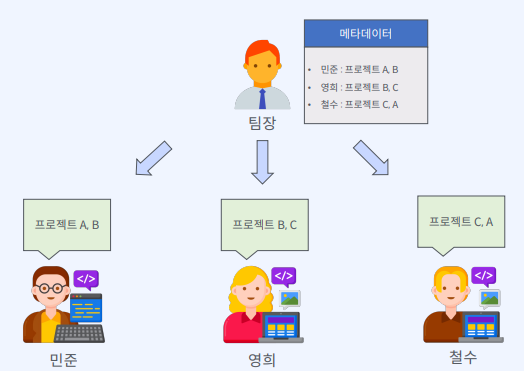

5. 철수가 휴가를 가더라도 영희가 c를 보조하고 있기 때문에 휴가가도 됨.

**즉, 팀원이 하나의 노드가 되는 것임. 하나가 문제가 생기더라도 다른 서버가 지원해서 처리해준다.**

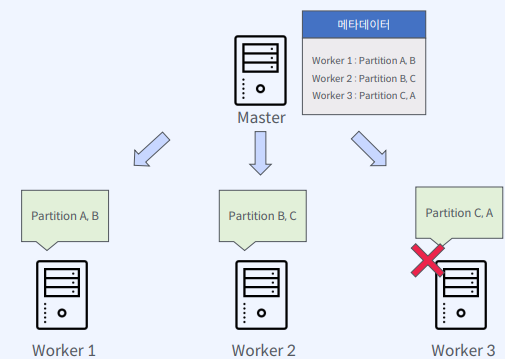

worker3이 가지는 것을 worker1에 복사본을 가지고 있음. worker3가 문제가 생기더라도 worker1과 worker2덕분에 돌아감.

## 3-2. 클러스트 규모 결정하기
### 3-2-1. 스토리지 용량으로 결정하기
    1. 하루에 생성되는 데이터양이 어느정도 되는지 파악해야함.
    2. 복제 전략 결정
        - 데이터를 얼마나 보관할지
        - 복제 개수가 일반적으로 3으로 설정되어 있음. 늘어나면 그만큼 데이터사이즈가 늘어남.
    3. 저장 기간 고려
    4. 필요한 노드 수 결정

#### 예시(스토리지 용량으로 결정하기)
    1. 저장될 데이터 크기 예측
        - 하루에 저장되는 데이터의 크기는 1TB
    2. 복제 전략 결정
        - 복제 계수는 3
    3. 저장 기간 고려
        - 3년
    4. 필요한 노드 수 결정
        - 서버 한대의 저장 용량 : 5TB * 12
        - 약 70대 -> 3년저장할 크기를 만들려면 70대가 필요할 것이라 추측

### 3-2-1. 스토리지 용량으로 결정하기 ‒ 추가 고려사항
- 데이터 포맷
- 데이터 압축 여부
- 데이터 증가율의 변화

### 3-2-2. 데이터 수집 속도로 결정하기
- 데이터 수집 속도 예측
- 데이터 처리 속도 예측

#### 예시(데이터 수집 속도로 결정하기)
- 1TB 데이터 분석
- 5분 이내에 결과를 저장
- 쓰기 속도는 디스크당 초당 50MB
- 디스크 70개가 병렬로 써야함
- 서버당 디스크가 24개씩 있는 경우
- 약 3대의 서버가 필요


### 3-2-3. 워크로드에 따른 하드웨어 선정
- CPU
- Memory
- I/O

**어떤 워크로드를 가지고 있느냐에 따라 하드웨어의 어느부분에 더 투자할 것인지**